In [11]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
DATADIR = 'Dataset2'

IMAGE_SIZE = [128, 128]
 
train_path = DATADIR+'/train'
valid_path = DATADIR+'/test'

In [13]:
labels = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']

In [14]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], 
              weights='imagenet',
              include_top=False)

In [15]:
for layer in vgg16.layers:
    layer.trainable = False

In [16]:
num_classes = glob("Dataset2/train/*")
num_classes

print(len(num_classes))

8


In [17]:
x = Flatten()(vgg16.output)
prediction = Dense(len(num_classes), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [18]:
# #model = create_model()
from tensorflow.keras import optimizers
sgd = optimizers.SGD()
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
  )

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255
                                  )
 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6623 images belonging to 8 classes.
Found 953 images belonging to 8 classes.


In [ ]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

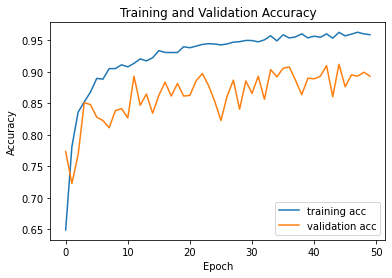

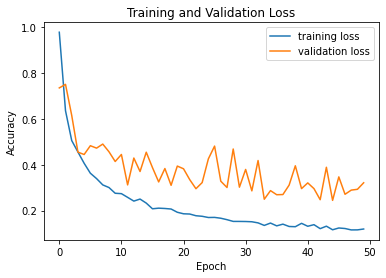

In [12]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [13]:
model.evaluate(test_set)

30/30 [==============================] - 2s 57ms/step - loss: 0.3216 - accuracy: 0.8930


[0.3216167688369751, 0.89296954870224]